In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
file = "SA_prod_cropandlivestock.csv"

In [4]:
pwd

'/home/jovyan/MLFall24/Datasets/FAOSTAT'

In [5]:
df = pd.read_csv(file)
#donor_ex.columns
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1961,1961,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
1,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1961,1961,t,80.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1962,1962,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
3,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1962,1962,t,90.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1963,1963,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN


In [6]:
SA_products = df.Item.unique()
print(SA_products)

['Almonds, in shell'
 'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw'
 'Apples' 'Apricots' 'Artichokes' 'Asparagus' 'Asses' 'Avocados' 'Bananas'
 'Barley' 'Beans, dry' 'Beer of barley, malted' 'Bees' 'Beeswax'
 'Broad beans and horse beans, dry' 'Butter of cow milk' 'Buttermilk, dry'
 'Canary seed' 'Cantaloupes and other melons' 'Carrots and turnips'
 'Cassava, fresh' 'Castor oil seeds' 'Cattle' 'Cattle fat, unrendered'
 'Cereals n.e.c.' 'Cheese from whole cow milk' 'Cherries'
 'Chick peas, dry' 'Chickens'
 'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw'
 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)'
 'Cotton lint, ginned' 'Cotton seed' 'Cottonseed oil' 'Cream, fresh'
 'Ducks' 'Edible offal of cattle, fresh, chilled or frozen'
 'Edible offal of goat, fresh, chilled or frozen'
 'Edible offal of pigs, fresh, chilled or frozen'
 'Edible offal of sheep, fresh, chilled or frozen'
 'Edible offals of horses and other equines,  fresh,

In [7]:
len(SA_products)

236

In [8]:
print(df.Element.unique())

['Area harvested' 'Production' 'Yield' 'Stocks'
 'Producing Animals/Slaughtered' 'Laying' 'Yield/Carcass Weight'
 'Milk Animals']


In [9]:
df_AH = df.loc[df.Element == "Area harvested"]
df_P =df.loc[df.Element == "Production"]
df_Y =df.loc[df.Element == "Yield"]
df_S =df.loc[df.Element == "Stocks"]
df_PAS =df.loc[df.Element == "Producing Animals/Slaughtered"]
df_L =df.loc[df.Element == "Laying"]
df_YCW =df.loc[df.Element == "Yield/Carcass Weight"]
df_MA =df.loc[df.Element == "Milk Animals"]

In [10]:
SA_prod_df_list = [df_AH, df_P, df_Y, df_S, df_PAS, df_L, df_YCW, df_MA]

In [11]:
for i in SA_prod_df_list:
    for j in i.columns:
        #print(j)
        print(j,len(i[j].unique()))
        #print(i[j].unique())
    print("\n")

Domain Code 1
Domain 1
Area Code (M49) 14
Area 14
Element Code 1
Element 1
Item Code (CPC) 136
Item 136
Year Code 62
Year 62
Unit 1
Value 23570
Flag 5
Flag Description 5
Note 2


Domain Code 1
Domain 1
Area Code (M49) 14
Area 14
Element Code 2
Element 1
Item Code (CPC) 220
Item 220
Year Code 62
Year 62
Unit 2
Value 58249
Flag 5
Flag Description 5
Note 2


Domain Code 1
Domain 1
Area Code (M49) 14
Area 14
Element Code 4
Element 1
Item Code (CPC) 142
Item 142
Year Code 62
Year 62
Unit 4
Value 37737
Flag 3
Flag Description 3
Note 1


Domain Code 1
Domain 1
Area Code (M49) 14
Area 14
Element Code 3
Element 1
Item Code (CPC) 16
Item 16
Year Code 62
Year 62
Unit 3
Value 5977
Flag 5
Flag Description 5
Note 2


Domain Code 1
Domain 1
Area Code (M49) 14
Area 14
Element Code 2
Element 1
Item Code (CPC) 33
Item 33
Year Code 62
Year 62
Unit 2
Value 5244
Flag 5
Flag Description 5
Note 2


Domain Code 1
Domain 1
Area Code (M49) 14
Area 14
Element Code 1
Element 1
Item Code (CPC) 2
Item 2
Year Code 6

In [12]:
# SA_prod_df_list = [df_AH, df_P, df_Y, df_S, df_PAS, df_L, df_YCW, df_MA]
for i in SA_prod_df_list:
    for j in i.columns:
        if j == "Unit":
            print(i[j].unique())
    print("\n")

['ha']


['t' '1000 No']


['kg/ha' '100 mg/An' 'No/An' '100 g/An']


['An' 'No' '1000 An']


['An' '1000 An']


['1000 An']


['100 g/An' '0.1 g/An']


['An']




In [13]:
for i in SA_prod_df_list:
    print(len(i.Area.unique()),i.Area.unique())
    print("\n")

14 ['Argentina' 'Bolivia (Plurinational State of)' 'Brazil' 'Chile'
 'Colombia' 'Ecuador' 'French Guiana' 'Guyana' 'Paraguay' 'Peru'
 'Suriname' 'Uruguay' 'Venezuela (Bolivarian Republic of)' 'South America']


14 ['Argentina' 'Bolivia (Plurinational State of)' 'Brazil' 'Chile'
 'Colombia' 'Ecuador' 'French Guiana' 'Guyana' 'Paraguay' 'Peru'
 'Suriname' 'Uruguay' 'Venezuela (Bolivarian Republic of)' 'South America']


14 ['Argentina' 'Bolivia (Plurinational State of)' 'Brazil' 'Chile'
 'Colombia' 'Ecuador' 'French Guiana' 'Guyana' 'Paraguay' 'Peru'
 'Suriname' 'Uruguay' 'Venezuela (Bolivarian Republic of)' 'South America']


14 ['Argentina' 'Bolivia (Plurinational State of)' 'Brazil' 'Chile'
 'Colombia' 'Ecuador' 'French Guiana' 'Guyana' 'Paraguay' 'Peru'
 'Suriname' 'Uruguay' 'Venezuela (Bolivarian Republic of)' 'South America']


14 ['Argentina' 'Bolivia (Plurinational State of)' 'Brazil' 'Chile'
 'Colombia' 'Ecuador' 'French Guiana' 'Guyana' 'Paraguay' 'Peru'
 'Suriname' 'Uruguay' '

1. Cluster Countries by Agricultural Efficiency

Question: Which countries are more efficient in terms of agricultural yield and production?
Variables: ‘Yield,’ ‘Production,’ ‘Yield/Carcass Weight,’ ‘Milk Animals.’
Outcome: This could group countries with higher agricultural output per hectare or per animal unit, identifying countries with efficient agricultural systems.

In [14]:
len(df_PAS.loc[df_PAS["Unit"] == "An"])

13903

In [15]:
an = df_PAS.loc[df_PAS["Unit"] == "An"]
print(an.Item.unique())

['Cattle fat, unrendered'
 'Edible offal of cattle, fresh, chilled or frozen'
 'Edible offal of goat, fresh, chilled or frozen'
 'Edible offal of pigs, fresh, chilled or frozen'
 'Edible offal of sheep, fresh, chilled or frozen'
 'Edible offals of horses and other equines,  fresh, chilled or frozen'
 'Fat of pigs' 'Game meat, fresh, chilled or frozen'
 'Goat fat, unrendered' 'Horse meat, fresh or chilled'
 'Meat of asses, fresh or chilled'
 'Meat of cattle with the bone, fresh or chilled'
 'Meat of goat, fresh or chilled' 'Meat of mules, fresh or chilled'
 'Meat of pig with the bone, fresh or chilled'
 'Meat of sheep, fresh or chilled'
 'Other meat n.e.c. (excluding mammals), fresh, chilled or frozen'
 'Raw hides and skins of cattle' 'Raw hides and skins of goats or kids'
 'Raw hides and skins of sheep or lambs' 'Sheep fat, unrendered'
 'Edible offals of camels and other camelids, fresh, chilled or frozen'
 'Meat of other domestic camelids, fresh or chilled'
 'Buffalo fat, unrendered'


In [16]:
an1000 = df_PAS.loc[df_PAS["Unit"] == "1000 An"]
print(an1000.Item.unique())

['Meat of chickens, fresh or chilled' 'Meat of ducks, fresh or chilled'
 'Meat of geese, fresh or chilled'
 'Meat of rabbits and hares, fresh or chilled'
 'Meat of turkeys, fresh or chilled'
 'Meat of other domestic rodents, fresh or chilled']


In [17]:
df_PAS.loc[df_PAS['Unit'] == '1000 An', 'Value'] = df['Value'] * 1000

In [18]:
df_PAS.loc[df_PAS['Unit'] == '1000 An', 'Unit'] = "An"

In [19]:
df_PAS.Unit.unique()

array(['An'], dtype=object)

['Area harvested' 'Production' 'Yield' 'Stocks'
 'Producing Animals/Slaughtered' 'Laying' 'Yield/Carcass Weight'
 'Milk Animals']

In [20]:
SA_prod_df_list = [df_AH, df_P, df_Y, df_S, df_PAS, df_L, df_YCW, df_MA]
for i in SA_prod_df_list:
    for j in i.columns:
        if j == "Unit":
            print(i[j].unique())
    print("\n")

['ha']


['t' '1000 No']


['kg/ha' '100 mg/An' 'No/An' '100 g/An']


['An' 'No' '1000 An']


['An']


['1000 An']


['100 g/An' '0.1 g/An']


['An']




In [21]:
len(df_P.loc[df_P.Unit == "t"])

95955

In [22]:
len(df_P.loc[df_P.Unit == "1000 No"])

1022

In [23]:
P_1000No = df_P.loc[df_P.Unit == "1000 No"]
P_1000No.head()

P_tonnes = df_P.loc[df_P.Unit == 't']
P_tonnes.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
1,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1961,1961,t,80.0,E,Estimated value,NaN
3,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1962,1962,t,90.0,E,Estimated value,NaN
5,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1963,1963,t,100.0,E,Estimated value,NaN
7,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1964,1964,t,100.0,E,Estimated value,NaN
9,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1965,1965,t,110.0,E,Estimated value,NaN


In [24]:
P_tonnes.to_csv("P_tonnes.csv")

In [25]:
df_AH.Item.unique()

array(['Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Artichokes', 'Asparagus', 'Avocados',
       'Bananas', 'Barley', 'Beans, dry',
       'Broad beans and horse beans, dry', 'Canary seed',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cassava, fresh', 'Castor oil seeds', 'Cereals n.e.c.', 'Cherries',
       'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Figs', 'Flax, raw or retted', 'Grapes', 'Green garlic',
       'Groundnuts, excluding shelled', 'Hop cones', 'Lemons and limes',
       'Lentils, dry', 'Linseed', 'Lupins', 'Maize (corn)',
       'Mangoes, guavas and mangosteens', 'Maté leaves', 'Millet', 'Oats',
       'Olives', 'Onions and shallots, dry (excluding dehydrated)',
       'Oranges', 'Other beans, green', 'Other fibre crops, raw, n.e.c.',
 

In [26]:
P_1000No.Item.unique()

array(['Hen eggs in shell, fresh',
       'Eggs from other birds in shell, fresh, n.e.c.'], dtype=object)

In [27]:
P_tonnes.Item.unique()

array(['Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Artichokes', 'Asparagus', 'Avocados',
       'Bananas', 'Barley', 'Beans, dry', 'Beer of barley, malted',
       'Beeswax', 'Broad beans and horse beans, dry',
       'Butter of cow milk', 'Buttermilk, dry', 'Canary seed',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cassava, fresh', 'Castor oil seeds', 'Cattle fat, unrendered',
       'Cereals n.e.c.', 'Cheese from whole cow milk', 'Cherries',
       'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cotton lint, ginned', 'Cotton seed', 'Cottonseed oil',
       'Cream, fresh', 'Edible offal of cattle, fresh, chilled or frozen',
       'Edible offal of goat, fresh, chilled or frozen',
       'Edible offal of pigs, fresh, chilled or frozen',
       'Edible 

In [28]:
P_tonnes.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [29]:
P_tonnes = P_tonnes.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code',
        'Flag', 'Flag Description', 'Note'])
P_tonnes.head()

,Area,Element,Item,Year,Unit,Value
1,Argentina,Production,"Almonds, in shell",1961,t,80.0
3,Argentina,Production,"Almonds, in shell",1962,t,90.0
5,Argentina,Production,"Almonds, in shell",1963,t,100.0
7,Argentina,Production,"Almonds, in shell",1964,t,100.0
9,Argentina,Production,"Almonds, in shell",1965,t,110.0


In [30]:
df_AH = df_AH.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code',
        'Flag', 'Flag Description', 'Note'])
df_AH.head()

,Area,Element,Item,Year,Unit,Value
0,Argentina,Area harvested,"Almonds, in shell",1961,ha,0.0
2,Argentina,Area harvested,"Almonds, in shell",1962,ha,0.0
4,Argentina,Area harvested,"Almonds, in shell",1963,ha,0.0
6,Argentina,Area harvested,"Almonds, in shell",1964,ha,0.0
8,Argentina,Area harvested,"Almonds, in shell",1965,ha,0.0


In [31]:
print(len(df_AH.loc[df_AH["Value"] == 0.0]))
print(len(df_AH))

6864
55892


In [32]:
df_S.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
1030,QCL,Crops and livestock products,32,Argentina,5111,Stocks,02132,Asses,1961,1961,An,129000.0,E,Estimated value,NaN
1031,QCL,Crops and livestock products,32,Argentina,5111,Stocks,02132,Asses,1962,1962,An,120000.0,E,Estimated value,NaN
1032,QCL,Crops and livestock products,32,Argentina,5111,Stocks,02132,Asses,1963,1963,An,110000.0,E,Estimated value,NaN
1033,QCL,Crops and livestock products,32,Argentina,5111,Stocks,02132,Asses,1964,1964,An,100000.0,A,Official figure,NaN
1034,QCL,Crops and livestock products,32,Argentina,5111,Stocks,02132,Asses,1965,1965,An,100000.0,E,Estimated value,NaN


In [33]:
merged_df = pd.merge(df_AH, P_tonnes, on=['Area', 'Item', 'Year'], how='left')

merged_df.head()

,Area,Element_x,Item,Year,Unit_x,Value_x,Element_y,Unit_y,Value_y
0,Argentina,Area harvested,"Almonds, in shell",1961,ha,0.0,Production,t,80.0
1,Argentina,Area harvested,"Almonds, in shell",1962,ha,0.0,Production,t,90.0
2,Argentina,Area harvested,"Almonds, in shell",1963,ha,0.0,Production,t,100.0
3,Argentina,Area harvested,"Almonds, in shell",1964,ha,0.0,Production,t,100.0
4,Argentina,Area harvested,"Almonds, in shell",1965,ha,0.0,Production,t,110.0


In [34]:
Y_kgha = df_Y.loc[df_Y["Unit"]== "kg/ha"]
Y_kgha.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
49,QCL,Crops and livestock products,32,Argentina,5412,Yield,01371,"Almonds, in shell",1985,1985,kg/ha,1702.1,E,Estimated value,NaN
52,QCL,Crops and livestock products,32,Argentina,5412,Yield,01371,"Almonds, in shell",1986,1986,kg/ha,1702.1,E,Estimated value,NaN
55,QCL,Crops and livestock products,32,Argentina,5412,Yield,01371,"Almonds, in shell",1987,1987,kg/ha,1702.1,E,Estimated value,NaN
58,QCL,Crops and livestock products,32,Argentina,5412,Yield,01371,"Almonds, in shell",1988,1988,kg/ha,1702.1,E,Estimated value,NaN
61,QCL,Crops and livestock products,32,Argentina,5412,Yield,01371,"Almonds, in shell",1989,1989,kg/ha,1787.2,E,Estimated value,NaN


In [35]:
Y_kgha = Y_kgha.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code',
        'Flag', 'Flag Description', 'Note'])
Y_kgha.head()

,Area,Element,Item,Year,Unit,Value
49,Argentina,Yield,"Almonds, in shell",1985,kg/ha,1702.1
52,Argentina,Yield,"Almonds, in shell",1986,kg/ha,1702.1
55,Argentina,Yield,"Almonds, in shell",1987,kg/ha,1702.1
58,Argentina,Yield,"Almonds, in shell",1988,kg/ha,1702.1
61,Argentina,Yield,"Almonds, in shell",1989,kg/ha,1787.2


In [36]:
em = pd.read_csv("SA_emissions_crops.csv")
em.head()

/tmp/ipykernel_354/3917006552.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  em = pd.read_csv("SA_emissions_crops.csv")


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,32,Argentina,72430,Crops total (Emissions N2O),0115,Barley,1961,1961,3050,FAO TIER 1,kt,2.415000e-01,E,Estimated value,NaN
1,GCE,Emissions from Crops,32,Argentina,72392,Crop residues (N content),0115,Barley,1961,1961,3050,FAO TIER 1,kg,1.254538e+07,E,Estimated value,NaN
2,GCE,Emissions from Crops,32,Argentina,72302,Crop residues (Emissions N2O),0115,Barley,1961,1961,3050,FAO TIER 1,kt,2.415000e-01,E,Estimated value,NaN
3,GCE,Emissions from Crops,32,Argentina,72342,Crop residues (Direct emissions N2O),0115,Barley,1961,1961,3050,FAO TIER 1,kt,1.971000e-01,E,Estimated value,NaN
4,GCE,Emissions from Crops,32,Argentina,72362,Crop residues (Indirect emissions N2O),0115,Barley,1961,1961,3050,FAO TIER 1,kt,4.440000e-02,E,Estimated value,NaN


In [37]:
em["Element"].unique()

array(['Crops total (Emissions N2O)', 'Crop residues (N content)',
       'Crop residues (Emissions N2O)',
       'Crop residues (Direct emissions N2O)',
       'Crop residues (Indirect emissions N2O)',
       'Crops total (Emissions CH4)',
       'Burning crop residues (Biomass burned, dry matter)',
       'Burning crop residues (Emissions N2O)',
       'Burning crop residues (Emissions CH4)', 'Area harvested',
       'Rice cultivation (Emissions CH4)',
       'Nitrogen fertilizer content applied that leaches',
       'Nitrogen fertilizer content applied that volatilises',
       'Synthetic fertilizers (Agricultural use)',
       'Synthetic fertilizers (Emissions N2O)',
       'Synthetic fertilizers (Direct emissions N2O)',
       'Indirect emissions (N2O that leaches) (Synthetic fertilizers)',
       'Indirect emissions (N2O that volatilises) (Synthetic fertilizers)',
       'Synthetic fertilizers (Indirect emissions N2O)'], dtype=object)

In [38]:
em_N20_total = em.loc[em["Element"] == "Crops total (Emissions N2O)"]
em_CH4_total = em.loc[em["Element"] == "Crops total (Emissions CH4)"]

In [39]:
print(len(em_N20_total))
print(len(em_CH4_total))

7484
3162


In [40]:
print(em_N20_total.columns)
print(em_CH4_total.columns)

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year',
       'Source Code', 'Source', 'Unit', 'Value', 'Flag', 'Flag Description',
       'Note'],
      dtype='object')
Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year',
       'Source Code', 'Source', 'Unit', 'Value', 'Flag', 'Flag Description',
       'Note'],
      dtype='object')


In [41]:
em_N20_total = em_N20_total.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
        'Item Code (CPC)',  'Year Code', 
       'Source Code', 'Source',  'Flag', 'Flag Description',
       'Note'])
em_CH4_total = em_CH4_total.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
        'Item Code (CPC)',  'Year Code', 
       'Source Code', 'Source',  'Flag', 'Flag Description',
       'Note'])

In [42]:
em_N20_total.head()

,Area,Element,Item,Year,Unit,Value
0,Argentina,Crops total (Emissions N2O),Barley,1961,kt,0.2415
5,Argentina,Crops total (Emissions N2O),Barley,1962,kt,0.1085
10,Argentina,Crops total (Emissions N2O),Barley,1963,kt,0.2815
15,Argentina,Crops total (Emissions N2O),Barley,1964,kt,0.2269
20,Argentina,Crops total (Emissions N2O),Barley,1965,kt,0.1229


In [43]:
em_CH4_total.head()

,Area,Element,Item,Year,Unit,Value
611,Argentina,Crops total (Emissions CH4),Maize (corn),1961,kt,7.4099
620,Argentina,Crops total (Emissions CH4),Maize (corn),1962,kt,7.4430
629,Argentina,Crops total (Emissions CH4),Maize (corn),1963,kt,7.1426
638,Argentina,Crops total (Emissions CH4),Maize (corn),1964,kt,8.0204
647,Argentina,Crops total (Emissions CH4),Maize (corn),1965,kt,8.2682


In [44]:
em_merged = pd.merge(em_CH4_total, em_N20_total, on=['Area', 'Item', 'Year'], how='left')

em_merged.head()

,Area,Element_x,Item,Year,Unit_x,Value_x,Element_y,Unit_y,Value_y
0,Argentina,Crops total (Emissions CH4),Maize (corn),1961,kt,7.4099,Crops total (Emissions N2O),kt,1.1111
1,Argentina,Crops total (Emissions CH4),Maize (corn),1962,kt,7.4430,Crops total (Emissions N2O),kt,1.1660
2,Argentina,Crops total (Emissions CH4),Maize (corn),1963,kt,7.1426,Crops total (Emissions N2O),kt,1.0258
3,Argentina,Crops total (Emissions CH4),Maize (corn),1964,kt,8.0204,Crops total (Emissions N2O),kt,1.2170
4,Argentina,Crops total (Emissions CH4),Maize (corn),1965,kt,8.2682,Crops total (Emissions N2O),kt,1.2008


In [45]:
em_merged.columns = ["Area", "x", "Item", "Year", "u_x", "CH4 emissions (kt)", "y", "u_y", "N20 emissions (kt)"]
em_merged.head()

,Area,x,Item,Year,u_x,CH4 emissions (kt),y,u_y,N20 emissions (kt)
0,Argentina,Crops total (Emissions CH4),Maize (corn),1961,kt,7.4099,Crops total (Emissions N2O),kt,1.1111
1,Argentina,Crops total (Emissions CH4),Maize (corn),1962,kt,7.4430,Crops total (Emissions N2O),kt,1.1660
2,Argentina,Crops total (Emissions CH4),Maize (corn),1963,kt,7.1426,Crops total (Emissions N2O),kt,1.0258
3,Argentina,Crops total (Emissions CH4),Maize (corn),1964,kt,8.0204,Crops total (Emissions N2O),kt,1.2170
4,Argentina,Crops total (Emissions CH4),Maize (corn),1965,kt,8.2682,Crops total (Emissions N2O),kt,1.2008


In [46]:
em_merged = em_merged.drop(columns = ["x", "u_x", "y", "u_y"])
em_merged.head()

,Area,Item,Year,CH4 emissions (kt),N20 emissions (kt)
0,Argentina,Maize (corn),1961,7.4099,1.1111
1,Argentina,Maize (corn),1962,7.4430,1.1660
2,Argentina,Maize (corn),1963,7.1426,1.0258
3,Argentina,Maize (corn),1964,8.0204,1.2170
4,Argentina,Maize (corn),1965,8.2682,1.2008


In [47]:
len(em_merged)

3162

In [48]:
efficiency =pd.merge(Y_kgha, merged_df, on=['Area', 'Item', 'Year'], how='left')

efficiency.head()

,Area,Element,Item,Year,Unit,Value,Element_x,Unit_x,Value_x,Element_y,Unit_y,Value_y
0,Argentina,Yield,"Almonds, in shell",1985,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
1,Argentina,Yield,"Almonds, in shell",1986,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
2,Argentina,Yield,"Almonds, in shell",1987,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
3,Argentina,Yield,"Almonds, in shell",1988,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
4,Argentina,Yield,"Almonds, in shell",1989,kg/ha,1787.2,Area harvested,ha,235.0,Production,t,420.0


In [49]:
len(efficiency)

48966

In [50]:
efficiency.columns = ["Area", "Element_Y", "Item", "Year", "Unit_Y", "Yield (kg/ha)", "Element_AH", "Unit_AH", "Area Harvested (ha)", "Element_P", "Unit_P", "Production (tonnes)"]
efficiency.head()

,Area,Element_Y,Item,Year,Unit_Y,Yield (kg/ha),Element_AH,Unit_AH,Area Harvested (ha),Element_P,Unit_P,Production (tonnes)
0,Argentina,Yield,"Almonds, in shell",1985,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
1,Argentina,Yield,"Almonds, in shell",1986,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
2,Argentina,Yield,"Almonds, in shell",1987,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
3,Argentina,Yield,"Almonds, in shell",1988,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
4,Argentina,Yield,"Almonds, in shell",1989,kg/ha,1787.2,Area harvested,ha,235.0,Production,t,420.0


In [51]:
efficiency.head()

,Area,Element_Y,Item,Year,Unit_Y,Yield (kg/ha),Element_AH,Unit_AH,Area Harvested (ha),Element_P,Unit_P,Production (tonnes)
0,Argentina,Yield,"Almonds, in shell",1985,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
1,Argentina,Yield,"Almonds, in shell",1986,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
2,Argentina,Yield,"Almonds, in shell",1987,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
3,Argentina,Yield,"Almonds, in shell",1988,kg/ha,1702.1,Area harvested,ha,235.0,Production,t,400.0
4,Argentina,Yield,"Almonds, in shell",1989,kg/ha,1787.2,Area harvested,ha,235.0,Production,t,420.0


In [52]:
len(efficiency)

48966

In [53]:
eff_kmeans_test_df = pd.merge(em_merged, efficiency, on=['Area', 'Item', 'Year'], how='left')

In [54]:
eff_kmeans_test_df.head()

,Area,Item,Year,CH4 emissions (kt),N20 emissions (kt),Element_Y,Unit_Y,Yield (kg/ha),Element_AH,Unit_AH,Area Harvested (ha),Element_P,Unit_P,Production (tonnes)
0,Argentina,Maize (corn),1961,7.4099,1.1111,Yield,kg/ha,1767.2,Area harvested,ha,2744400.0,Production,t,4850000.0
1,Argentina,Maize (corn),1962,7.4430,1.1660,Yield,kg/ha,1893.6,Area harvested,ha,2756670.0,Production,t,5220000.0
2,Argentina,Maize (corn),1963,7.1426,1.0258,Yield,kg/ha,1648.1,Area harvested,ha,2645400.0,Production,t,4360000.0
3,Argentina,Maize (corn),1964,8.0204,1.2170,Yield,kg/ha,1801.0,Area harvested,ha,2970500.0,Production,t,5350000.0
4,Argentina,Maize (corn),1965,8.2682,1.2008,Yield,kg/ha,1678.5,Area harvested,ha,3062300.0,Production,t,5140000.0


In [55]:
print(len(eff_kmeans_test_df))
eff_kmeans_test_df = eff_kmeans_test_df.dropna()
print(len(eff_kmeans_test_df))
#print(len(eff_kmeans_test_df))

3162
3116


In [56]:
#Lots of data lost because the labels in the emissions csv were different than the production csv. 
#Will still work for the purposes of running kmeans but not for any meaninful results

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
eff_kmeans_test_df[["CH4 emissions (kt)", "N20 emissions (kt)", 'Area Harvested (ha)', 'Production (tonnes)', 'Yield (kg/ha)']] = scaler.fit_transform(eff_kmeans_test_df[["CH4 emissions (kt)", "N20 emissions (kt)",'Area Harvested (ha)', 'Production (tonnes)', 'Yield (kg/ha)']])



In [58]:
eff_kmeans_test_df.head()

,Area,Item,Year,CH4 emissions (kt),N20 emissions (kt),Element_Y,Unit_Y,Yield (kg/ha),Element_AH,Unit_AH,Area Harvested (ha),Element_P,Unit_P,Production (tonnes)
0,Argentina,Maize (corn),1961,-0.209089,0.121804,Yield,kg/ha,-0.561618,Area harvested,ha,0.344762,Production,t,-0.167747
1,Argentina,Maize (corn),1962,-0.208745,0.145103,Yield,kg/ha,-0.557327,Area harvested,ha,0.348204,Production,t,-0.163552
2,Argentina,Maize (corn),1963,-0.211865,0.085604,Yield,kg/ha,-0.565661,Area harvested,ha,0.316987,Production,t,-0.173302
3,Argentina,Maize (corn),1964,-0.202748,0.166747,Yield,kg/ha,-0.560471,Area harvested,ha,0.408195,Production,t,-0.162078
4,Argentina,Maize (corn),1965,-0.200174,0.159872,Yield,kg/ha,-0.564629,Area harvested,ha,0.433950,Production,t,-0.164459


In [59]:
eff_kmeans_test_df.columns

Index(['Area', 'Item', 'Year', 'CH4 emissions (kt)', 'N20 emissions (kt)',
       'Element_Y', 'Unit_Y', 'Yield (kg/ha)', 'Element_AH', 'Unit_AH',
       'Area Harvested (ha)', 'Element_P', 'Unit_P', 'Production (tonnes)'],
      dtype='object')

In [60]:
eff_kmeans_test_df = eff_kmeans_test_df.drop(columns = ['Element_Y', 'Unit_Y', 'Element_AH', 'Unit_AH','Element_P', 'Unit_P'])

In [61]:
eff_kmeans_test_df.to_csv("eff_kmeans_test_df.csv")

In [62]:
eff_kmeans_test_df.head()

,Area,Item,Year,CH4 emissions (kt),N20 emissions (kt),Yield (kg/ha),Area Harvested (ha),Production (tonnes)
0,Argentina,Maize (corn),1961,-0.209089,0.121804,-0.561618,0.344762,-0.167747
1,Argentina,Maize (corn),1962,-0.208745,0.145103,-0.557327,0.348204,-0.163552
2,Argentina,Maize (corn),1963,-0.211865,0.085604,-0.565661,0.316987,-0.173302
3,Argentina,Maize (corn),1964,-0.202748,0.166747,-0.560471,0.408195,-0.162078
4,Argentina,Maize (corn),1965,-0.200174,0.159872,-0.564629,0.433950,-0.164459


In [63]:
efficiency_data = eff_kmeans_test_df.iloc[:,3:]
efficiency_data.head()

,CH4 emissions (kt),N20 emissions (kt),Yield (kg/ha),Area Harvested (ha),Production (tonnes)
0,-0.209089,0.121804,-0.561618,0.344762,-0.167747
1,-0.208745,0.145103,-0.557327,0.348204,-0.163552
2,-0.211865,0.085604,-0.565661,0.316987,-0.173302
3,-0.202748,0.166747,-0.560471,0.408195,-0.162078
4,-0.200174,0.159872,-0.564629,0.433950,-0.164459


In [64]:
efficiency_labels = eff_kmeans_test_df.iloc[:,:3]
efficiency_labels.head()

,Area,Item,Year
0,Argentina,Maize (corn),1961
1,Argentina,Maize (corn),1962
2,Argentina,Maize (corn),1963
3,Argentina,Maize (corn),1964
4,Argentina,Maize (corn),1965


In [65]:
eff_kmeans_test_df.Item.unique()

array(['Maize (corn)', 'Sugar cane', 'Rice', 'Wheat'], dtype=object)

In [66]:
print(len(efficiency_data))
efficiency_data = efficiency_data.dropna()
print(len(efficiency_data))

3116
3116


In [67]:
efficiency_data.head()

,CH4 emissions (kt),N20 emissions (kt),Yield (kg/ha),Area Harvested (ha),Production (tonnes)
0,-0.209089,0.121804,-0.561618,0.344762,-0.167747
1,-0.208745,0.145103,-0.557327,0.348204,-0.163552
2,-0.211865,0.085604,-0.565661,0.316987,-0.173302
3,-0.202748,0.166747,-0.560471,0.408195,-0.162078
4,-0.200174,0.159872,-0.564629,0.433950,-0.164459


In [68]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3, svd_solver='full')

principalComponents3 = pca3.fit_transform(efficiency_data)
#principalComponents
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf3.head()

,principal component 1,principal component 2,principal component 3
0,0.249932,-0.410282,-0.486739
1,0.267504,-0.406824,-0.489936
2,0.207328,-0.415174,-0.477567
3,0.322638,-0.405149,-0.503721
4,0.335696,-0.406574,-0.507715


In [69]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2, svd_solver='full')

principalComponents2 = pca2.fit_transform(efficiency_data)
#principalComponents
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
principalDf2.head()

,principal component 1,principal component 2
0,0.249932,-0.410282
1,0.267504,-0.406824
2,0.207328,-0.415174
3,0.322638,-0.405149
4,0.335696,-0.406574


In [86]:
evr2 = pca2.explained_variance_ratio_
cv2 = evr2.cumsum()

evr3 = pca3.explained_variance_ratio_
cv3 = evr3.cumsum()

variance_left2 = 1 - cv2[1]
variance_left3 = 1 - cv3[2]

print("EVR for 2 components ",evr2)
print("CV for 2 components", cv2)
print(f"Variance left after {2} components:", variance_left2.round(3))
print("\n")

print("EVR for 3 components ",evr3)
print("CV for 3 components", cv3)
print(f"Variance left after {3} components:", variance_left3.round(3))
print("\n")


EVR for 2 components  [0.43161672 0.27180186]
CV for 2 components [0.43161672 0.70341858]
Variance left after 2 components: 0.297


EVR for 3 components  [0.43161672 0.27180186 0.16240378]
CV for 3 components [0.43161672 0.70341858 0.86582236]
Variance left after 3 components: 0.134




In [88]:
loadings = pca3.components_.T * np.sqrt(pca3.explained_variance_)  # Eigenvectors (loadings)
loadings_df = pd.DataFrame(loadings, index=efficiency_data.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display the loadings
print(loadings_df)

                          PC1       PC2       PC3
CH4 emissions (kt)   0.494712 -0.318291  0.802093
N20 emissions (kt)   0.925479 -0.126897 -0.165086
Yield (kg/ha)       -0.161830  0.794156  0.310337
Area Harvested (ha)  0.949660  0.132848 -0.211968
Production (tonnes)  0.359836  0.770520  0.020835


In [71]:
from sklearn.decomposition import PCA

pca4 = PCA(n_components=4, svd_solver='full')

principalComponents4 = pca4.fit_transform(efficiency_data)
#principalComponents
principalDf4 = pd.DataFrame(data = principalComponents4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principalDf4.head()

evr4 = pca4.explained_variance_ratio_
cv4 = evr4.cumsum()

variance_left4 = 1 - cv4[3]

print("EVR for 4 components ",evr3)
print("CV for 4 components", cv3)
print(f"Variance left after {4} components:", variance_left4.round(3))
print("\n")

EVR for 4 components  [0.43161672 0.27180186 0.16240378]
CV for 4 components [0.43161672 0.70341858 0.86582236]
Variance left after 4 components: 0.012




In [72]:
#Need 4 out of the 5 dimensions to account for >95% of the variance.

In [73]:
cov = np.cov(efficiency_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov)

sorted_indices = np.argsort(eigenvalues)[::-1] 
sorted_eigenvalues = eigenvalues[sorted_indices]

top_three_eigenvalues = sorted_eigenvalues[:3]

print("Top three eigenvalues:", top_three_eigenvalues)

Top three eigenvalues: [2.15877639 1.3594456  0.81227956]


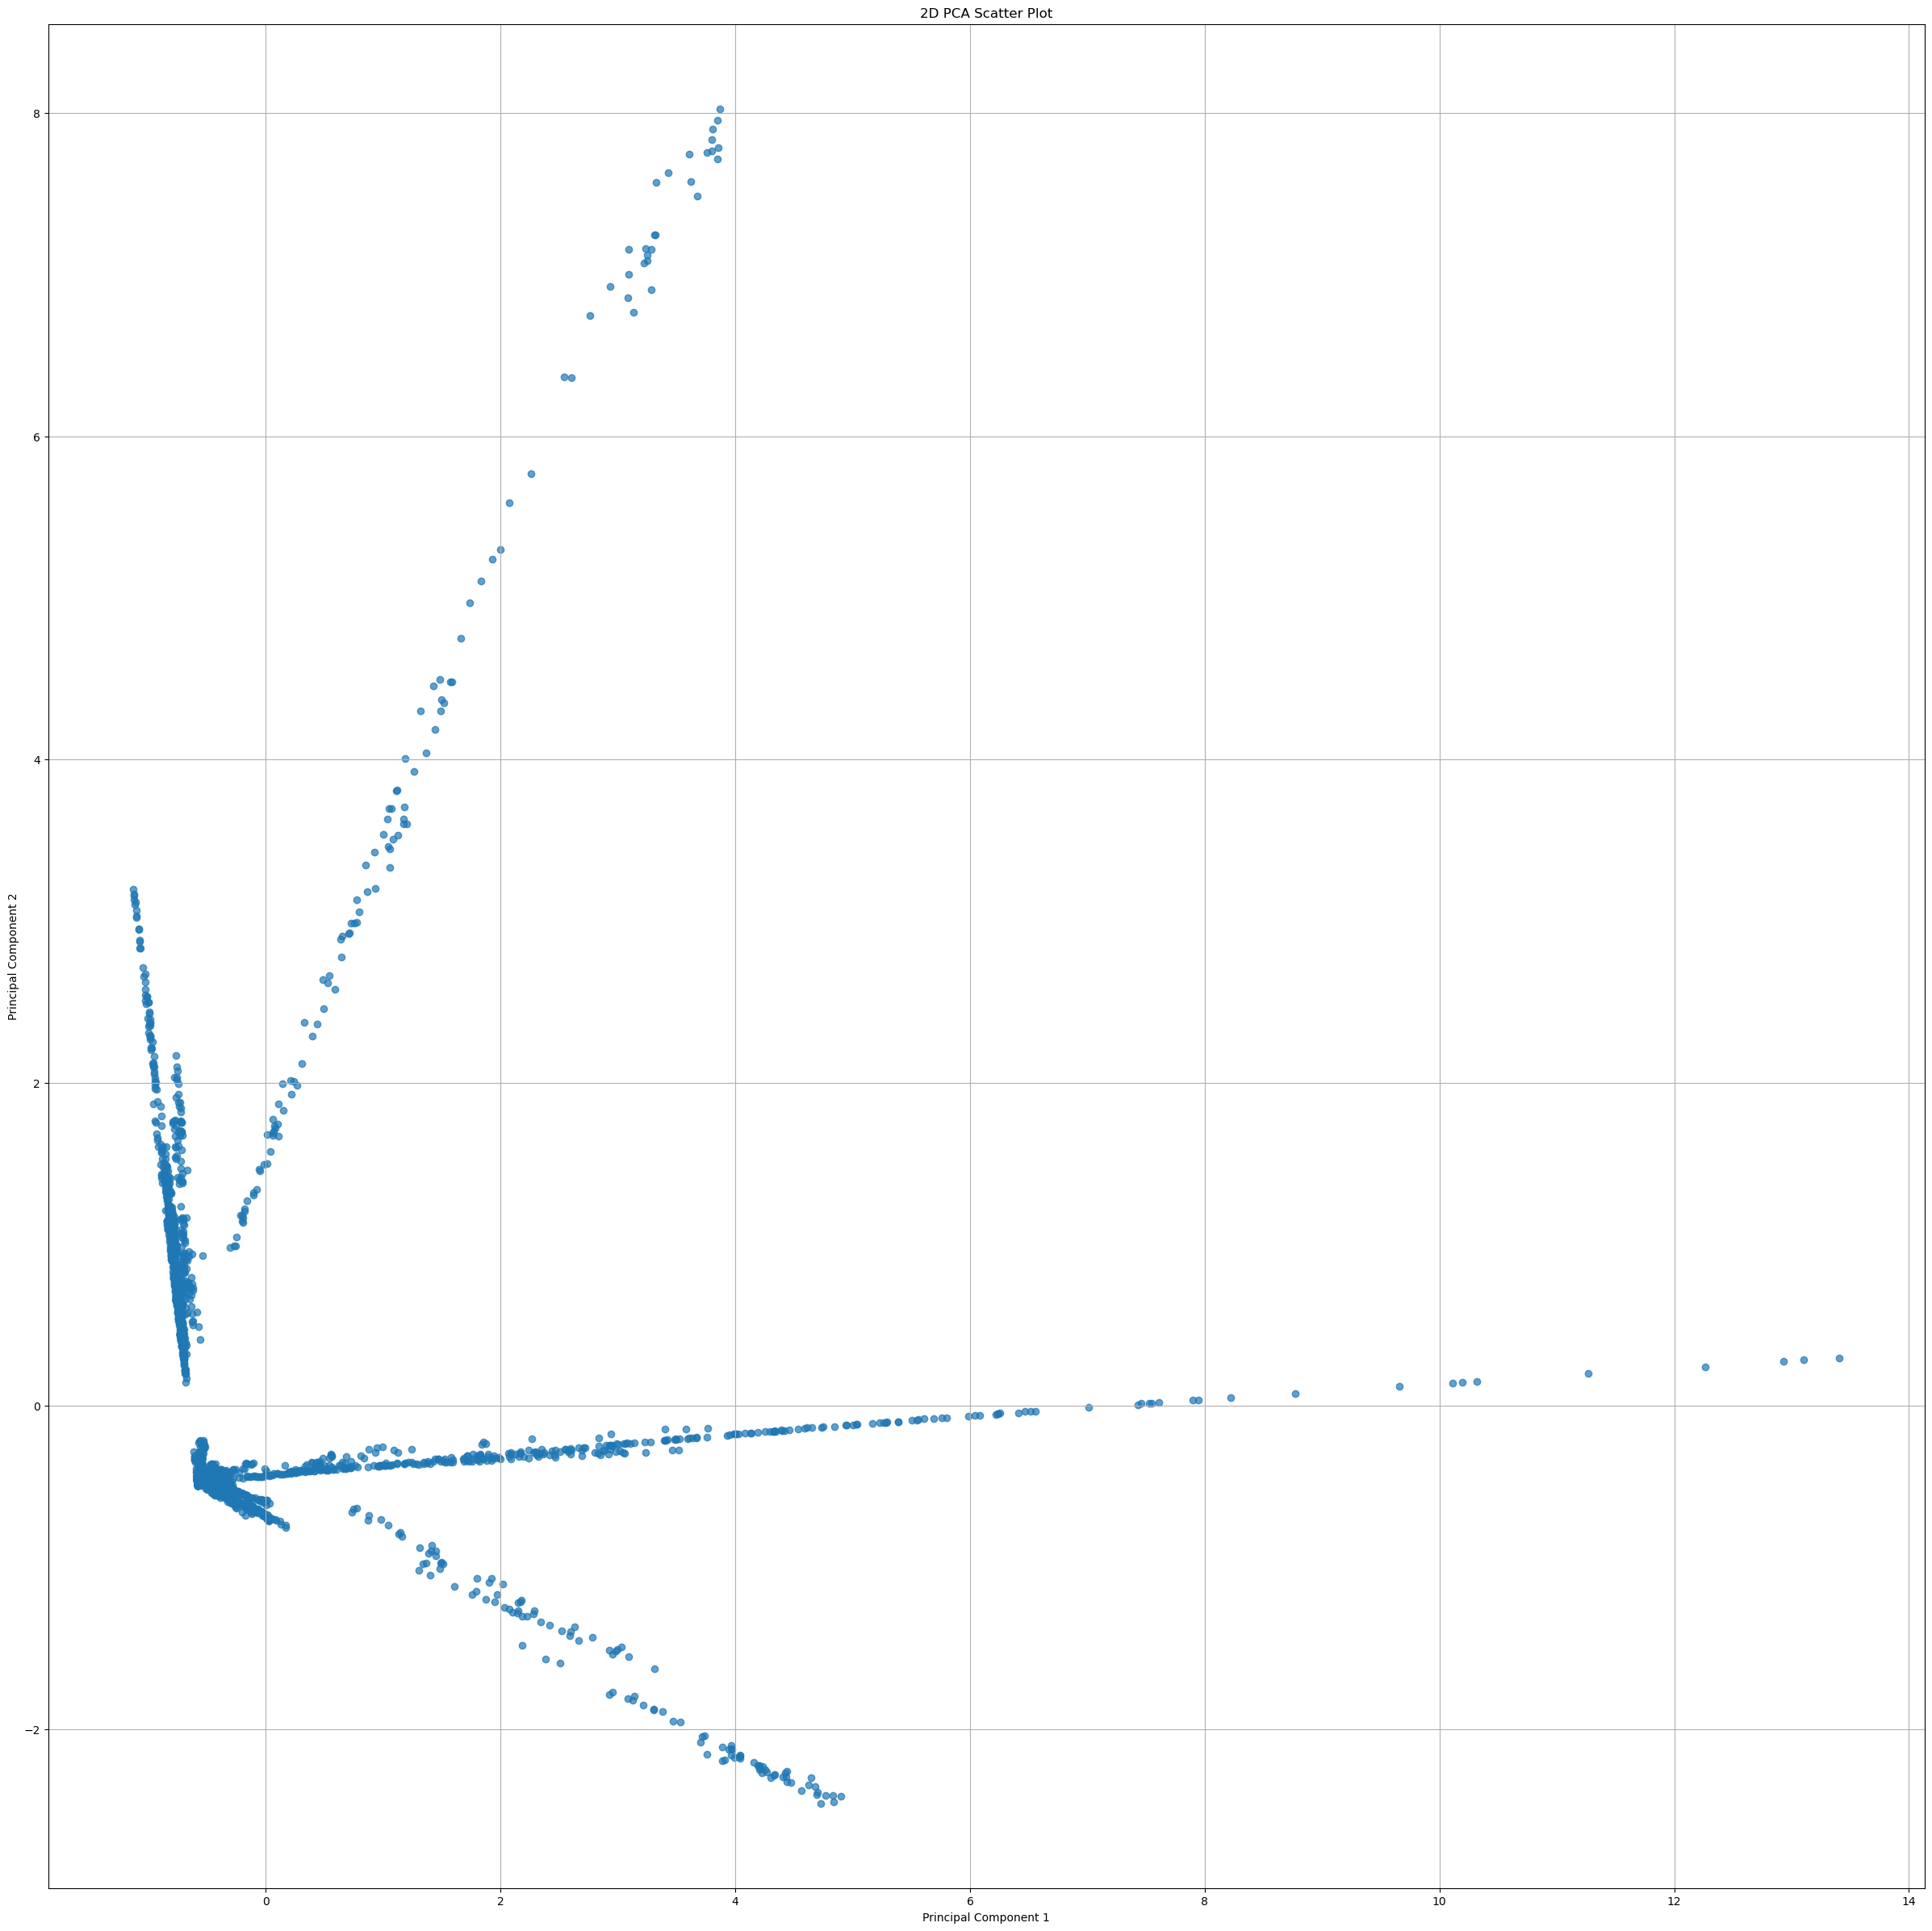

In [74]:

pca_df2 = pd.DataFrame(data=principalComponents2, columns=['Principal Component 1', 'Principal Component 2'])

plt.figure(figsize=(30, 30))
plt.scatter(pca_df2['Principal Component 1'].values, pca_df2['Principal Component 2'].values, alpha=0.7)
plt.title('2D PCA Scatter Plot')
plt.title('2D PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Optional: Create a scatter plot using seaborn (if you have labels)
# sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Label', data=pca_df, palette='viridis', alpha=0.7)
# plt.title('2D PCA Scatter Plot with Labels')
# plt.grid()
# plt.show()

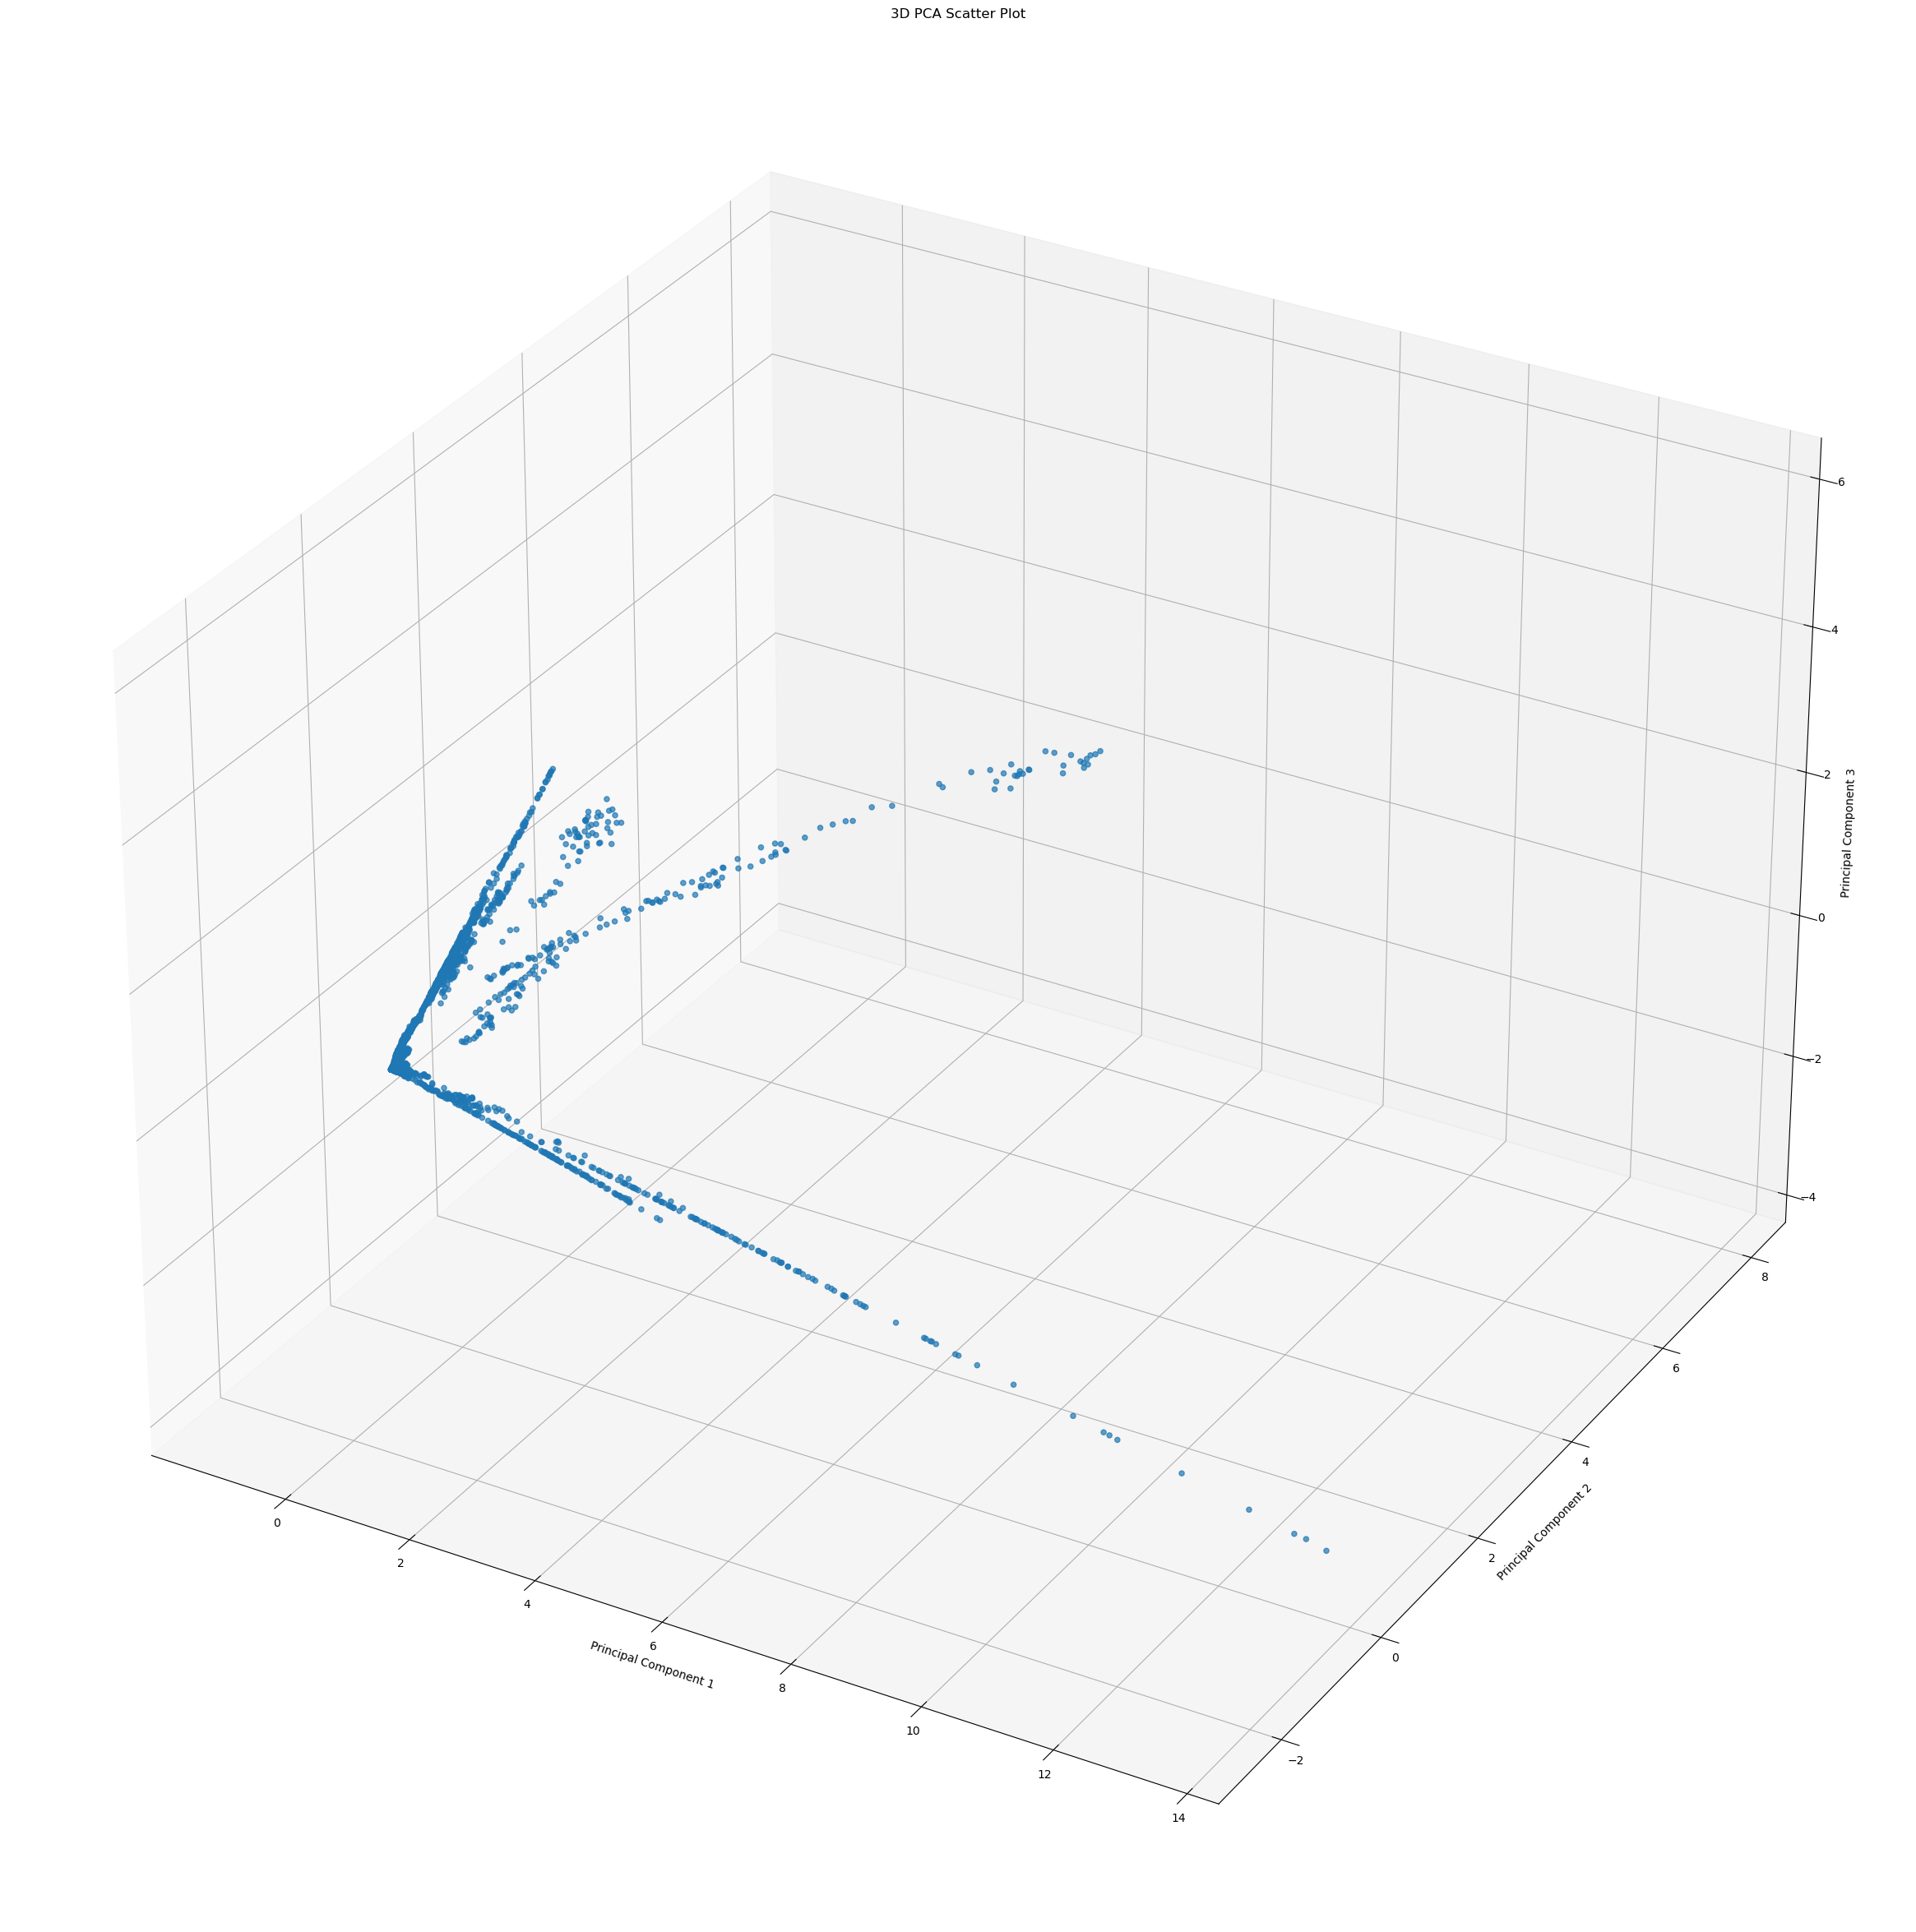

In [75]:
pca_df3 = pd.DataFrame(data=principalComponents3, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Step 4: Create a 3D scatter plot
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
ax.scatter(pca_df3['Principal Component 1'], pca_df3['Principal Component 2'], pca_df3['Principal Component 3'], alpha=0.7)

# Adding titles and labels
ax.set_title('3D PCA Scatter Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters based on silhouette score: 3


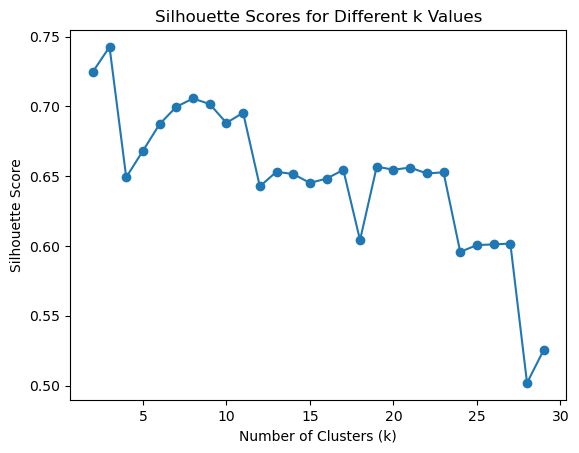

In [76]:
pca_data = pca_df3.copy()

from sklearn.metrics import silhouette_score


# Assuming you have already performed PCA and have 3-dimensional PCA data
# 'pca_data' should be your 3-dimensional PCA-transformed data
# pca_data.shape should be (n_samples, 3)

# Define the range of k values to try
k_values = range(2, 30)  # Try different k values, from 2 to 9 clusters

# Initialize lists to store silhouette scores for each k
silhouette_scores = []

# Loop over different values of k to fit KMeans and compute silhouette scores
for k in k_values:
    # Step 1: Fit KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    
    # Step 2: Predict the cluster labels
    labels = kmeans.labels_
    
    # Step 3: Calculate the silhouette score
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

# Step 4: Find the optimal k based on the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]

# Print the best k based on silhouette score
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# Step 5: Plot silhouette scores vs k values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average Silhouette Score: 0.7056936930941251


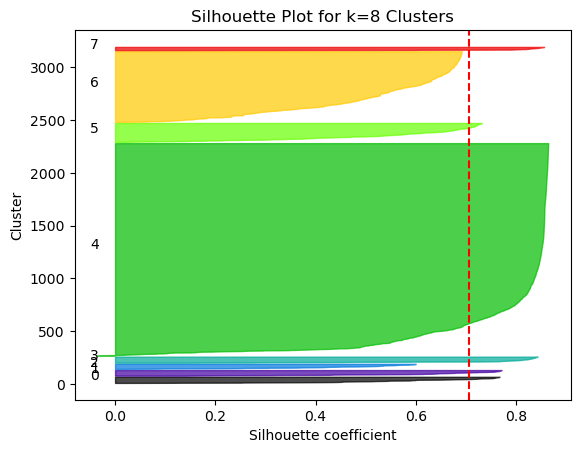

In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have PCA-transformed data and have applied KMeans
kmeans = KMeans(n_clusters=8)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette score for each sample
silhouette_vals = silhouette_samples(pca_data, cluster_labels)

# Silhouette score for overall clustering
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Plot silhouette scores
fig, ax = plt.subplots()
y_lower = 10

for i in range(8):  # Number of clusters (3 in this case)
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / 8)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # 10 for spacing between clusters

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")

# Red vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.title("Silhouette Plot for k=8 Clusters")
plt.show()

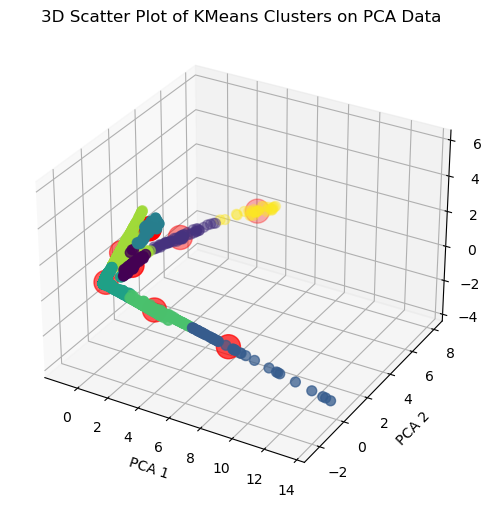

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans

centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points, color by cluster label
ax.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], pca_data.iloc[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='o', label='Centroids')

# Set labels for the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Set a title
ax.set_title('3D Scatter Plot of KMeans Clusters on PCA Data')

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average Silhouette Score: 0.7426396160822013


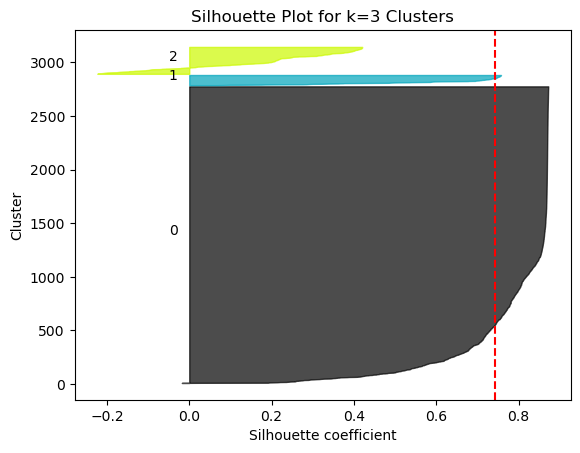

In [79]:


# Assuming you already have PCA-transformed data and have applied KMeans
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette score for each sample
silhouette_vals = silhouette_samples(pca_data, cluster_labels)

# Silhouette score for overall clustering
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Plot silhouette scores
fig, ax = plt.subplots()
y_lower = 10

for i in range(3):  # Number of clusters (3 in this case)
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # 10 for spacing between clusters

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")

# Red vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.title("Silhouette Plot for k=3 Clusters")
plt.show()

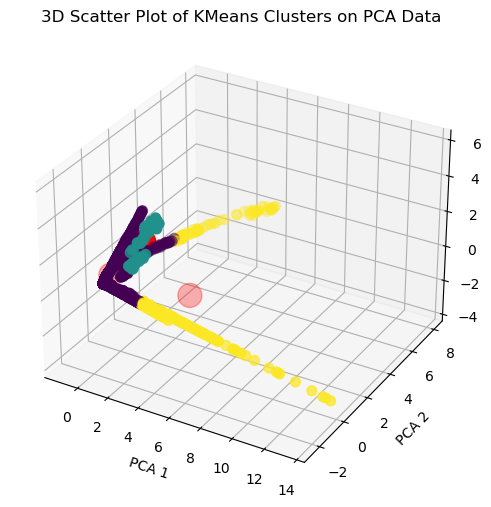

In [80]:
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points, color by cluster label
ax.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], pca_data.iloc[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='o', label='Centroids')

# Set labels for the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Set a title
ax.set_title('3D Scatter Plot of KMeans Clusters on PCA Data')

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average Silhouette Score: 0.7247681682094554


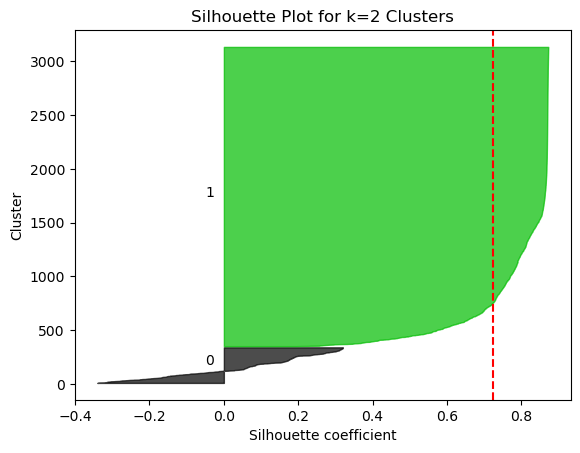

In [81]:
# Assuming you already have PCA-transformed data and have applied KMeans
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette score for each sample
silhouette_vals = silhouette_samples(pca_data, cluster_labels)

# Silhouette score for overall clustering
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Plot silhouette scores
fig, ax = plt.subplots()
y_lower = 10

for i in range(2):  # Number of clusters (2 in this case)
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / 2)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # 10 for spacing between clusters

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")

# Red vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.title("Silhouette Plot for k=2 Clusters")
plt.show()

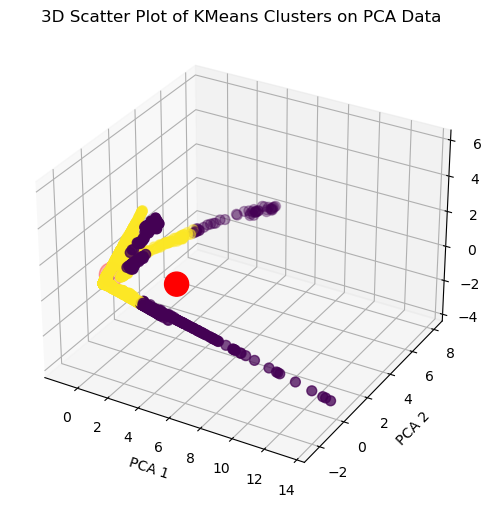

In [82]:
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points, color by cluster label
ax.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], pca_data.iloc[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='o', label='Centroids')

# Set labels for the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Set a title
ax.set_title('3D Scatter Plot of KMeans Clusters on PCA Data')

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average Silhouette Score: 0.5939526610253398


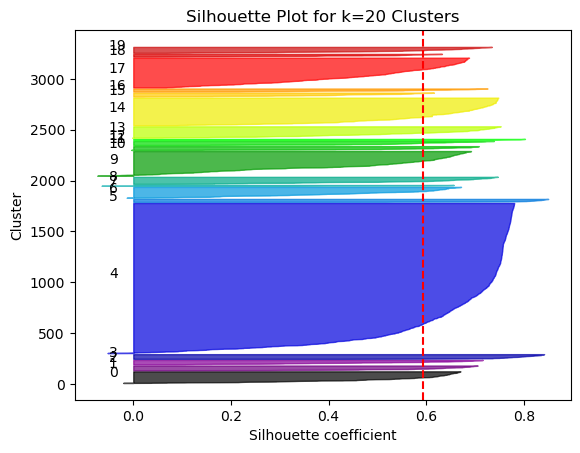

In [83]:
# Assuming you already have PCA-transformed data and have applied KMeans
kmeans = KMeans(n_clusters=20)
cluster_labels = kmeans.fit_predict(pca_data)

# Silhouette score for each sample
silhouette_vals = silhouette_samples(pca_data, cluster_labels)

# Silhouette score for overall clustering
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f"Average Silhouette Score: {silhouette_avg}")

# Plot silhouette scores
fig, ax = plt.subplots()
y_lower = 10

for i in range(20):  # Number of clusters (3 in this case)
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / 20)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # 10 for spacing between clusters

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster")

# Red vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.title("Silhouette Plot for k=20 Clusters")
plt.show()

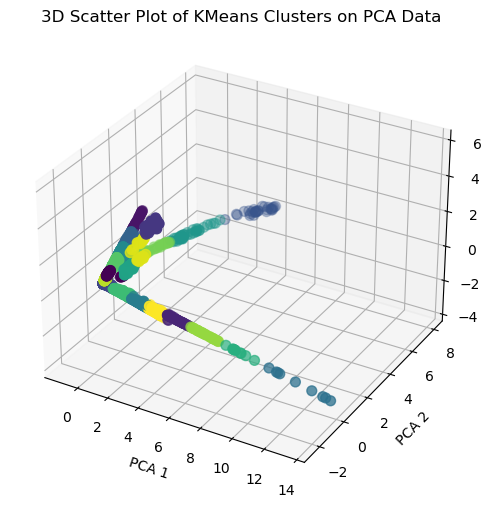

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans


# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points, color by cluster label
ax.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], pca_data.iloc[:, 2], c=cluster_labels, cmap='viridis', s=50)

# Set labels for the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Set a title
ax.set_title('3D Scatter Plot of KMeans Clusters on PCA Data')

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

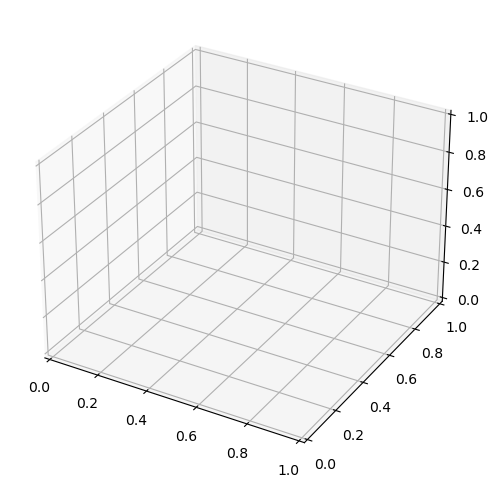

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans

# Assuming pca_data is the PCA-transformed data with 3 components (n_samples, 3)
# Run KMeans on the PCA data with 3 components
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters if needed
cluster_labels = kmeans.fit_predict(pca_data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points, color by cluster label
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=cluster_labels, cmap='viridis', s=50)

# Set labels for the axes
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Set a title
ax.set_title('3D Scatter Plot of KMeans Clusters on PCA Data')

# Show the plot
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42)

# Fit the model to the data
kmeans.fit(efficiency_data)

# Get the cluster labels for each data point
labels = kmeans.labels_



In [ ]:
# Add the cluster labels to the original DataFrame
efficiency_data["Cluster"] = labels

In [ ]:
efficiency_data.head()

In [ ]:
efficiency_data.Cluster.unique()

In [ ]:
result = pd.concat([efficiency_data, efficiency_labels], axis=1)

In [ ]:
result.head()

In [ ]:


result.groupby('Cluster')[['Yield (kg/ha)', 'Production (tonnes)', 'Area Harvested (ha)']].mean()
result.head()

In [ ]:
result.info()

In [ ]:

c0 = result[result["Cluster"] == 0]
#c0.head()
print(c0["Area"].unique())
print(c0.Item.unique())
print(c0.Year.unique())

In [ ]:
c1 = result[result["Cluster"] == 1]
#c0.head()
print(c1["Area"].unique())
print(c1.Item.unique())
print(c1.Year.unique())

In [ ]:
c2 = result[result["Cluster"] == 2]
#c0.head()
print(c2["Area"].unique())
print(c2.Item.unique())
print(c2.Year.unique())

In [ ]:
c3 = result[result["Cluster"] == 3]
#c0.head()
print(c3["Area"].unique())
print(c3.Item.unique())
print(c3.Year.unique())

In [ ]:
c4 = result[result["Cluster"] == 4]
#c0.head()
print(c4["Area"].unique())
print(c4.Item.unique())
print(c4.Year.unique())

In [ ]:
c5 = result[result["Cluster"] == 5]
#c0.head()
print(c5["Area"].unique())
print(c5.Item.unique())
print(c5.Year.unique())

In [ ]:
c6 = result[result["Cluster"] == 6]
#c0.head()
print(c6["Area"].unique())
print(c6.Item.unique())
print(c6.Year.unique())

In [ ]:
c7 = result[result["Cluster"] == 7]
#c0.head()
print(c7["Area"].unique())
print(c7.Item.unique())
print(c7.Year.unique())

In [ ]:
c8 = result[result["Cluster"] == 8]
#c0.head()
print(c8["Area"].unique())
print(c8.Item.unique())
print(c8.Year.unique())

In [ ]:
c9 = result[result["Cluster"] == 9]
#c0.head()
print(c9["Area"].unique())
print(c9.Item.unique())
print(c9.Year.unique())

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model to the data
kmeans.fit(pca_df3)

# Get the cluster labels for each data point
labels = kmeans.labels_

ef = efficiency_data.copy()

In [ ]:
# Add the cluster labels to the original DataFrame
ef["Cluster"] = labels

In [ ]:
ef.head()

In [ ]:
ef.Cluster.value_counts()

In [ ]:
result2 = pd.concat([ef, efficiency_labels], axis=1)

In [ ]:
result2.head()

In [ ]:
result2.groupby('Cluster')[['Yield (kg/ha)', 'Production (tonnes)', 'Area Harvested (ha)']].mean()
result2.head()

In [ ]:
result2.info()

In [ ]:

c0 = result2[result2["Cluster"] == 0]
#c0.head()
print(c0["Area"].unique())
print(c0.Item.unique())
print(c0.Year.unique())

In [ ]:
c1 = result2[result2["Cluster"] == 1]
#c0.head()
print(c1["Area"].unique())
print(c1.Item.unique())
print(c1.Year.unique())

In [ ]:
c2 = result2[result2["Cluster"] == 2]
#c0.head()
print(c2["Area"].unique())
print(c2.Item.unique())
print(c2.Year.unique())

In [ ]:
c3 = result2[result2["Cluster"] == 3]
#c0.head()
print(c3["Area"].unique())
print(c3.Item.unique())
print(c3.Year.unique())

In [ ]:
c4 = result2[result2["Cluster"] == 4]
#c0.head()
print(c4["Area"].unique())
print(c4.Item.unique())
print(c4.Year.unique())

In [ ]:
c5 = result2[result2["Cluster"] == 5]
#c0.head()
print(c5["Area"].unique())
print(c5.Item.unique())
print(c5.Year.unique())

In [ ]:
c6 = result2[result2["Cluster"] == 6]
#c0.head()
print(c6["Area"].unique())
print(c6.Item.unique())
print(c6.Year.unique())

In [ ]:
c7 = result2[result2["Cluster"] == 7]
#c0.head()
print(c7["Area"].unique())
print(c7.Item.unique())
print(c7.Year.unique())

In [ ]:
c8 = result2[result2["Cluster"] == 8]
#c0.head()
print(c8["Area"].unique())
print(c8.Item.unique())
print(c8.Year.unique())

In [ ]:
c9 = result2[result2["Cluster"] == 9]
#c0.head()
print(c9["Area"].unique())
print(c9.Item.unique())
print(c9.Year.unique())

In [ ]:
km5 = KMeans(n_clusters=5, random_state=0) 

km5.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km5.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [ ]:
km4 = KMeans(n_clusters=4, random_state=0) 
km4.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km4.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [ ]:
km7 = KMeans(n_clusters=7, random_state=0) 
km7.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km7.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [ ]:
km8 = KMeans(n_clusters=8, random_state=0) 
km8_fit = km8.fit(principalDf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue=km8.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [ ]:
#inertias = [km8.inertia_,km7.inertia_,km.inertia_, km5.inertia_, km4.inertia_]
#ks = [8,7,6,5,4]
#k_i = pd.DataFrame({'K': ks,
#     'SSE': inertias
#    })
#k_i

In [ ]:
small_df = donor_ex.sample(100)
small_df.head()
#small_df.shape

In [ ]:
# Separating out the features
xdf = small_df.loc[:, features].values

# Separating out the target
ydf = donor_ex_o.loc[:,['geneID']].values

# Standardizing the features
xdf = StandardScaler().fit_transform(xdf)

In [ ]:
principalComponents = pca.fit_transform(xdf)
#principalComponents
pca_smdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca_smdf.head()

In [ ]:
#Now do Kmeans clustering on donor_ex
#from sklearn.cluster import KMeans
#wcss_sm = []
#for i in range(1, 20): 
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#    kmeans.fit(pca_smdf) 
#    wcss_sm.append(kmeans.inertia_)

In [ ]:
#plt.plot(range(1, 20), wcss_sm)
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS') 
#plt.title("Elbow Plot")
#plt.show()

In [ ]:
ks6 = KMeans(n_clusters=6, random_state=0) 
ks6.fit(pca_smdf)

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=pca_smdf, x="principal component 1", y="principal component 2", hue=ks6.labels_).set(title='KMeans Clustering of Donor 1 Genes')
plt.show()

In [ ]:
ks6_sil = silhouette_score(pca_smdf, ks6.labels_, metric='euclidean', random_state=42)
ks6_sil

In [ ]:
ks5 = KMeans(n_clusters=5, random_state=0) 
ks5.fit(pca_smdf)
ks5_sil = silhouette_score(pca_smdf, ks5.labels_, metric='euclidean', random_state=42)
ks5_sil

In [ ]:
ks4 = KMeans(n_clusters=4, random_state=0) 
ks4.fit(pca_smdf)
ks4_sil = silhouette_score(pca_smdf, ks4.labels_, metric='euclidean', random_state=42)
ks4_sil

In [ ]:
ks3 = KMeans(n_clusters=3, random_state=0) 
ks3.fit(pca_smdf)
ks3_sil = silhouette_score(pca_smdf, ks3.labels_, metric='euclidean', random_state=42)
ks3_sil

In [ ]:
ks2 = KMeans(n_clusters=2, random_state=0) 
ks2.fit(pca_smdf)
ks2_sil = silhouette_score(pca_smdf, ks2.labels_, metric='euclidean', random_state=42)
ks2_sil

In [ ]:
ks7 = KMeans(n_clusters=7, random_state=0) 
ks7.fit(pca_smdf)
ks7_sil = silhouette_score(pca_smdf, ks7.labels_, metric='euclidean', random_state=42)
ks7_sil

In [ ]:
ks8 = KMeans(n_clusters=8, random_state=0) 
ks8.fit(pca_smdf)
ks8_sil = silhouette_score(pca_smdf, ks8.labels_, metric='euclidean', random_state=42)
ks8_sil

In [ ]:
ks9 = KMeans(n_clusters=9, random_state=0) 
ks9.fit(pca_smdf)
ks9_sil = silhouette_score(pca_smdf, ks9.labels_, metric='euclidean', random_state=42)
ks9_sil

In [ ]:
ks10 = KMeans(n_clusters=10, random_state=0) 
ks10.fit(pca_smdf)
ks10_sil = silhouette_score(pca_smdf, ks10.labels_, metric='euclidean', random_state=42)
ks10_sil

In [ ]:
#Dateset with only 1000 genes
sils = {3:ks3_sil, 4:ks4_sil, 5:ks5_sil, 6:ks6_sil, 7:ks7_sil, 8:ks8_sil, 9:ks9_sil, 10:ks10_sil}
sils_df = pd.DataFrame.from_dict(sils, orient='index')
sils_df.index.name = 'k'
sils_df.columns = ["silhouette score"]
sils_df

In [ ]:
pca_data.to_csv("pca_data.csv")